<a href="https://colab.research.google.com/github/aaacaes/AE370-Project-2/blob/main/GroupProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Method Justification + Derivation

## Justification of Numerical Methods

The numerical method selected for solving the Burgers' equation is an **IMEX (Implicit-Explicit) method** utilizing a second-order central finite difference discretization in space, **Crank-Nicolson** for the implicit term, and **Heun's Method** for the explicit term. This method was selected to balance **accuracy, stability, and computational cost** based on the different characteristics of the diffusion and convection terms in Burgers' equation.

We justify each component of the method below.

---

### 1. Justification for IMEX Approach

Burgers' equation contains two fundamentally different terms:

- The **nonlinear convection term** is **non-stiff**, but nonlinear.
- The **linear diffusion term** is **stiff**, due to the diffusive nature of the operator.

Treating both terms the same would be inefficient:

- Solving the nonlinear convection term implicitly would require solving a nonlinear system at every time step, which would be computationally expensive.
- Solving the diffusion term explicitly would severely limit the allowable time step to ensure stability.

Specifically, when solving time-dependent PDEs with explicit methods, there is a relationship between the time step \( \Delta t \) and the spatial discretization \( \Delta x \) that must be satisfied for stability. This condition is often referred to as a **Courant–Friedrichs–Lewy (CFL) condition.** It ensures that information from the physical system does not travel faster numerically than it would physically.

Although we have not explicitly discussed CFL conditions in class, it can be interpreted as a **stability constraint that forces the time step to be small enough relative to the spatial discretization and the speed of the physical process.**

For diffusion-dominated problems, the corresponding constraint would be of the form:

$$
\Delta t \leq \frac{\Delta x^2}{2 \nu}.
$$

This constraint can be **very restrictive** when \( \Delta x \) is small.

The IMEX approach addresses these issues by splitting the problem:

- The **convection term is treated explicitly**, since it is non-stiff and can be advanced with a reasonable time step for stability.
- The **diffusion term is treated implicitly**, eliminating the restrictive stability constraint for diffusion and allowing larger time steps.

This hybrid approach allows each term to be handled by the method best suited to its numerical properties.

---

### 2. Justification for Crank-Nicolson Method (Implicit Diffusion Term)

The **Crank-Nicolson method** was selected for the implicit treatment of the diffusion term:

- **Stability:** Crank-Nicolson is an **A-stable method**, meaning it is stable for all eigenvalues satisfying:

$$
Re(\lambda \Delta t) \leq 0,
$$

where \( \lambda \) is an eigenvalue of the discretized operator.

This stability property allows arbitrarily large time steps without violating stability for stiff problems like diffusion.

- **Accuracy:** Crank-Nicolson is **second-order accurate in time**, providing improved accuracy over backward Euler while retaining unconditional stability.

- **Reduced numerical damping:** Crank-Nicolson introduces less numerical diffusion than backward Euler, preserving more accurate diffusion behavior in the numerical solution.

For a stiff diffusion term, Crank-Nicolson provides a strong balance of unconditional stability and accuracy.

---

### 3. Justification for Heun's Method (Explicit Convection Term)

The **Heun's Method** (explicit trapezoidal method) was selected for the explicit treatment of the nonlinear convection term:

- **Accuracy:** Heun’s method is **second-order accurate in time**, providing better accuracy than first-order explicit methods.

- **Stability:** For the explicit treatment of the convection term, the time step must be chosen small enough to maintain stability for the evolving solution. Even though we have not formally discussed CFL conditions in class, the general idea applies: **the time step must be limited so that information does not propagate numerically faster than it physically should.** For convection, this relationship is typically proportional to:

$$
\Delta t \leq \frac{\Delta x}{|u|_{max}},
$$

where \( |u|_{max} \) represents the maximum velocity in the system.

By selecting a time step to respect this constraint, Heun’s method remains stable while maintaining second-order accuracy.

- **Efficiency:** Heun’s method requires only two function evaluations per time step and avoids solving a nonlinear system, reducing computational cost compared to implicit methods for nonlinear problems.

---

### 4. Summary of Justification

The IMEX method, combining Crank-Nicolson for the stiff diffusion term and Heun's method for the non-stiff convection term, provides a numerical scheme that:

- Is **unconditionally stable for the diffusion term** under \( Re(\lambda \Delta t) \leq 0 \).
- Requires a manageable time step for explicit stability of the convection term.
- Is **second-order accurate in time** for both terms.
- Avoids solving nonlinear systems while maintaining stability and accuracy.
- Enables time integration of Burgers' equation without restrictive time step limits from the diffusion term.

This method effectively addresses the stability, accuracy, and computational efficiency needs for solving the problem.





## Derivation of IMEX Method for Burgers' Equation Using Method of Lines

We begin with the Burgers' equation:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}, \quad x \in [0, L], \; t > 0
$$

with initial condition:

$$
u(x, 0) = \eta(x)
$$

and appropriate boundary conditions (to be specified separately).

---

## 1. Discretization of Spatial Domain

We discretize the spatial domain into $N$ equally spaced grid points:

$$
x_j = j \Delta x, \quad j = 1, 2, \dots, N
$$

where:

$$
\Delta x = \frac{L}{N+1}.
$$

We approximate:

$$
u_j(t) \approx u(x_j, t),
$$

where $u_j(t)$ is the numerical approximation at grid point $x_j$.

**Note on indexing:**  
In this derivation, the boundary points at $j = 1$ and $j = N$ are included in the vector $\mathbf{u}(t)$ and in the finite difference matrices. This formulation keeps the derivation general to accommodate different types of boundary conditions.  
In contrast, the class notes define $\mathbf{u}(t)$ to include **only interior unknowns**, excluding boundary points when Dirichlet boundary conditions are imposed directly.  
If Dirichlet boundary conditions are applied, the matrix system would need to be adjusted to solve only for interior nodes, and known boundary values would be incorporated into the right-hand side.

---

## 2. Derivation of Finite Difference Operators via Local Polynomial Interpolation

To derive the finite difference formulas, we construct a local degree-1 (linear) interpolating polynomial over points $x_{j-1}$, $x_j$, $x_{j+1}$.

We use the Lagrange basis functions:

$$
\ell_{j-1}(x) = \frac{(x - x_j)(x - x_{j+1})}{(x_{j-1} - x_j)(x_{j-1} - x_{j+1})},
$$

$$
\ell_j(x) = \frac{(x - x_{j-1})(x - x_{j+1})}{(x_j - x_{j-1})(x_j - x_{j+1})},
$$

$$
\ell_{j+1}(x) = \frac{(x - x_{j-1})(x - x_j)}{(x_{j+1} - x_{j-1})(x_{j+1} - x_j)}.
$$

The interpolant is:

$$
p(x) = u_{j-1} \ell_{j-1}(x) + u_j \ell_j(x) + u_{j+1} \ell_{j+1}(x).
$$

Taking derivatives of $p(x)$ at $x = x_j$ yields:

**First derivative (centered difference):**

$$
\left. \frac{d p}{dx} \right|_{x = x_j} = \frac{u_{j+1} - u_{j-1}}{2 \Delta x}.
$$

**Second derivative (centered difference):**

$$
\left. \frac{d^2 p}{dx^2} \right|_{x = x_j} = \frac{u_{j+1} - 2u_j + u_{j-1}}{\Delta x^2}.
$$

These formulas are derived directly from differentiating the Lagrange basis functions.

---

## 3. Discretized Burgers' Equation at Each Grid Point

Substitute these expressions into the PDE at $x_j$:

$$
\frac{d u_j}{d t} + u_j \frac{u_{j+1} - u_{j-1}}{2 \Delta x} = \nu \frac{u_{j+1} - 2u_j + u_{j-1}}{\Delta x^2}.
$$

Solving for the time derivative:

$$
\frac{d u_j}{d t} = -u_j \frac{u_{j+1} - u_{j-1}}{2 \Delta x} + \nu \frac{u_{j+1} - 2u_j + u_{j-1}}{\Delta x^2}.
$$

---

## 4. Vector Form: Method of Lines

Define:

$$
\mathbf{u}(t) =
\begin{bmatrix}
u_1(t) \\
u_2(t) \\
\vdots \\
u_N(t)
\end{bmatrix}.
$$

Define matrix $A$ (second derivative operator):

$$
A = \frac{\nu}{\Delta x^2}
\begin{bmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \dots & 0 \\
0 & 1 & -2 & \dots & 0 \\
\vdots & & & \ddots & \vdots \\
0 & 0 & 0 & 1 & -2
\end{bmatrix}.
$$

Define nonlinear function $B(\mathbf{u})$:

$$
B(\mathbf{u}) =
\begin{bmatrix}
u_1 \frac{u_2 - u_0}{2 \Delta x} \\
u_2 \frac{u_3 - u_1}{2 \Delta x} \\
\vdots \\
u_{N-1} \frac{u_N - u_{N-2}}{2 \Delta x} \\
u_N \frac{u_{N+1} - u_{N-1}}{2 \Delta x}
\end{bmatrix}.
$$

Then the semi-discrete system (method of lines form) is:

$$
\dot{\mathbf{u}} = -B(\mathbf{u}) + A \mathbf{u}.
$$

---

## 5. IMEX Time-Stepping

We apply an IMEX scheme to:

$$
\dot{\mathbf{u}} = -B(\mathbf{u}) + A \mathbf{u}.
$$

- Treat $A \mathbf{u}$ **implicitly**.
- Treat $-B(\mathbf{u})$ **explicitly**.

---

**Implicit term: Crank-Nicolson:**

$$
A \mathbf{u}^{n+1/2} \approx \frac{1}{2} A \mathbf{u}^{n+1} + \frac{1}{2} A \mathbf{u}^n.
$$

**Explicit term: Heun's Method:**

Predictor:

$$
k_1 = -B(\mathbf{u}^n).
$$

Temporary value:

$$
\mathbf{u}^* = \mathbf{u}^n + \Delta t k_1.
$$

Corrector:

$$
k_2 = -B(\mathbf{u}^*).
$$

Heun’s explicit term:

$$
B_{\text{Heun}} = \frac{1}{2}(k_1 + k_2).
$$

---

## 6. Fully Discrete Update Equation

The time-stepping equation:

$$
\frac{\mathbf{u}^{n+1} - \mathbf{u}^n}{\Delta t} = B_{\text{Heun}} + \frac{1}{2} A \mathbf{u}^{n+1} + \frac{1}{2} A \mathbf{u}^n.
$$

Solve for $\mathbf{u}^{n+1}$:

$$
\left( I - \frac{\Delta t}{2} A \right) \mathbf{u}^{n+1} = \left( I + \frac{\Delta t}{2} A \right) \mathbf{u}^n + \Delta t B_{\text{Heun}}.
$$

This is a linear system for $\mathbf{u}^{n+1}$ solvable at each time step.

---

## 7. Initial Condition

At $t = 0$:

$$
u_j(0) = \eta(x_j),
$$

so:

$$
\mathbf{u}^0 =
\begin{bmatrix}
\eta(x_1) \\
\eta(x_2) \\
\vdots \\
\eta(x_N)
\end{bmatrix}.
$$

---

## Summary

We have derived an IMEX method for Burgers' equation:

1. By interpolating with Lagrange basis functions to derive second-order central finite differences.
2. By discretizing spatial derivatives to obtain $\dot{\mathbf{u}} = -B(\mathbf{u}) + A \mathbf{u}$.
3. By applying Crank-Nicolson to the implicit linear diffusion term.
4. By applying Heun’s method to the explicit nonlinear convection term.
5. By including boundary points in $\mathbf{u}(t)$ and matrices for generality, with a note that class notes exclude boundary points when imposing Dirichlet conditions directly.
6. By obtaining a fully discrete update equation solvable iteratively at each time step.




## **need error and stability properties**

# Validation of IMEX Solver via Cole–Hopf Transform

Prior to applying our Strang-split IMEX scheme to more complex or physically realistic setups (e.g.\ non-periodic boundaries, variable viscosity, or shock formation), it is essential to demonstrate that the code and discretization have been implemented correctly.  By comparing the numerical solution to an exact, analytic solution—available here via the Cole–Hopf transform to the heat equation—we obtain a “ground truth” test.  Success in this verification implies that the same solver and boundary-condition handling can be trusted when no closed-form solution exists.m.

---

## 1. Governing Equation and Boundary Conditions

The viscous Burgers’ equation is posed on the periodic interval $x\in[0,2\pi]$:
$$
u_t + u\,u_x = \nu\,u_{xx},
\quad
u(x,0) = u_0(x),
$$
with periodic boundary conditions enforced:
$$
u(0,t) = u(2\pi,t),
\quad
u_x(0,t) = u_x(2\pi,t).
$$

---

## 2. Cole–Hopf Transformation

1. **Transform definition**  
   The scalar field $\phi(x,t)$ is introduced by
   $$
   \phi(x,t)
   = \exp\!\Bigl(-\frac{1}{2\nu}\!\int_{0}^{x} u(\xi,t)\,\mathrm d\xi\Bigr),
   $$
   so that
   $$
   u(x,t)
   = -2\nu\,\frac{\partial_x \phi(x,t)}{\phi(x,t)}.
   $$

2. **Derivation of the heat equation**  
   Substitution of $u$ in terms of $\phi$ into Burgers’ equation yields the linear heat equation
   $$
   \phi_t = \nu\,\phi_{xx},
   $$
   subject to inherited periodic boundary conditions
   $$
   \phi(0,t)=\phi(2\pi,t),
   \quad
   \phi_x(0,t)=\phi_x(2\pi,t).
   $$

3. **Analytic test case**  
   By prescribing
   $$
   \phi(x,0) = 1 + \varepsilon\cos x,
   \quad 0<\varepsilon<1,
   $$
   positivity of $\phi$ is guaranteed.  The exact heat‐equation solution is
   $$
   \phi(x,t) = 1 + \varepsilon\,e^{-\nu t}\cos x,
   $$
   and application of the transform produces
   $$
   u_{\mathrm{exact}}(x,t)
   = 2\nu\,\frac{\varepsilon\,e^{-\nu t}\,\sin x}
                     {1 + \varepsilon\,e^{-\nu t}\cos x}.
   $$

---

  ## 3. IMEX Discretization via Strang Splitting

  A second‐order accurate IMEX method was constructed by Strang splitting the diffusion and advection steps:

  1. **Half‐step diffusion (Crank–Nicolson)**  
    The diffusion equation
    $$
    u_t = \nu\,u_{xx}
    $$
    was integrated from $t^n$ to $t^n+\tfrac{\Delta t}{2}$ by Crank–Nicolson in Fourier space:
    $$
    \widehat{u}^*(k)
    = \frac{1 - \tfrac{\nu\,\Delta t}{2}\,k^2}{1 + \tfrac{\nu\,\Delta t}{2}\,k^2}\,\widehat{u}^n(k),
    $$
    where $k$ are the Fourier wavenumbers.  Equivalently in physical space,
    $$
    u_j^*
    - \frac{\nu\,\Delta t}{2}\,D_{xx}u_j^*
    = u_j^n + \frac{\nu\,\Delta t}{2}\,D_{xx}u_j^n,
    $$
    with
    $$
    D_{xx}u_j = \frac{u_{j-1} - 2u_j + u_{j+1}}{\Delta x^2}.
    $$

  2. **Full‐step advection (Heun’s method)**  
    The nonlinear advection
    $$
    u_t = -\,u\,u_x
    $$
    was integrated from $t^n+\tfrac{\Delta t}{2}$ to $t^n+\tfrac{3\Delta t}{2}$ using Heun’s method:

    - Define the centered‐difference operator:
      $$
      D_0u_j = \frac{u_{j+1} - u_{j-1}}{2\,\Delta x}.
      $$

    - Compute slopes and updates:
      
      $$
      k_1 = -\,u_j^*\,D_0u_j^*,
      \quad
      u_j^{(1)} = u_j^* + \Delta t\,k_1,
      $$

      $$
      k_2 = -\,u_j^{(1)}\,D_0u_j^{(1)},
      \quad
      u_j^{**} = u_j^* + \frac{\Delta t}{2}\bigl(k_1 + k_2\bigr).
      $$

  3. **Half‐step diffusion (Crank–Nicolson)**  
    A second Crank–Nicolson half‐step was applied to advance from $t^n+\tfrac{3\Delta t}{2}$ to $t^{n+1}$ in Fourier space:
    $$
    \widehat{u}^{n+1}(k)
    = \frac{1 - \tfrac{\nu\,\Delta t}{2}\,k^2}{1 + \tfrac{\nu\,\Delta t}{2}\,k^2}\,\widehat{u}^{**}(k),
    $$
    or equivalently in physical space,
    $$
    u_j^{n+1}
    - \frac{\nu\,\Delta t}{2}\,D_{xx}u_j^{n+1}
    = u_j^{**} + \frac{\nu\,\Delta t}{2}\,D_{xx}u_j^{**}.
    $$

  Periodic boundary conditions were enforced implicitly via the FFT.  Stability was constrained by the explicit advection CFL condition,
  $$
  \Delta t \le C \,\frac{\Delta x}{\max|u|},
  $$
  while the diffusion steps remained unconditionally stable.  

  This Strang‐splitting IMEX scheme has been shown to achieve second‐order accuracy in time for both linear diffusion and nonlinear advection.

  ---

  ## 4. Verification Procedure

  The accuracy of the Strang‐splitting IMEX solver was assessed by comparison to the Cole–Hopf analytic solution:

  1. **Initialization**  
    The numerical solution was initialized with the exact profile
    $$
    u_j^0 = u_{\rm exact}(x_j,0).
    $$

  2. **Time–march**  
    For each step $n=0,\dots,N_t-1$, a half‐step Crank–Nicolson diffusion was applied, followed by a full‐step Heun advection, then a final half‐step Crank–Nicolson diffusion.

  3. **Error metric**  
    At the final time $T$, the discrete $L^2$ norm was computed:
    $$
    \|e\|_2
      = \sqrt{\sum_{j=0}^{N-1}\bigl(u_j^{N_t}-u_{\rm exact}(x_j,T)\bigr)^2\,\Delta x}.
    $$

  4. **Convergence study**  
    By halving $\Delta x$ (and scaling $\Delta t\propto\Delta x$) repeatedly, the decay rate of $\|e\|_2$ was confirmed to be second‐order in time and spectral‐accurate in space.

  This verification step ensures that the combined Crank–Nicolson + Heun split achieves its formal accuracy before proceeding to more complex Burgers’ simulations.
  Burgers’ simulations.
  idation confirms that the IMEX solver reproduces the known analytic solution to within the expected accuracy, providing confidence for subsequent studies of nonlinear Burgers’ dynamics.
  enforced naturally by the FFT.  

  ## Validation via Comparison to the Analytic Solution

  We choose parameters
  $$
  \nu=0.1,\quad \varepsilon=0.5,\quad T=0.5,
  $$
  and compute the numerical solution $u_{\rm num}(x,T)$ on a uniform grid of $N_x$ points, time-step $\Delta t$.  We then measure the error
  $$
  \|u_{\rm num}-u_{\rm exact}\|_{L^2}
  = \sqrt{\sum_{j=1}^{N_x}\bigl(u_{\rm num}(x_j)-u_{\rm exact}(x_j,T)\bigr)^2\,\Delta x}\,,
  $$
  and verify that it decays at the expected order as $\Delta x,\Delta t\to0$.


# Tym- Proof of Numerical method working

In [ ]:

# 1) Imports & parameters
import numpy as np
import matplotlib.pyplot as plt

# physical parameters
nu      = 0.1               # viscosity
epsilon = 0.5               # Cole–Hopf amplitude
L       = 2*np.pi           # domain length
N       = 256               # number of grid points (power of 2)
dx      = L/N               # spatial step
x       = np.linspace(0, L, N, endpoint=False)
T_final       = 0.5               # final time
dt      = 0.002             # time step
Nt      = int(T_final/dt)         # number of steps

# precompute spectral wavenumbers
k = np.fft.fftfreq(N, d=dx) * 2*np.pi


In [ ]:
# ── Block 2: Function Definitions ──
def u_exact(x, t):
    """Analytic solution via Cole–Hopf."""
    phi = 1 + epsilon * np.exp(-nu*t) * np.cos(x)
    return 2*nu * (epsilon * np.exp(-nu*t) * np.sin(x)) / phi

def CN_diffusion(u, dt_half):
    """Crank–Nicolson half-step (in Fourier space)."""
    u_hat  = np.fft.fft(u)
    factor = (1 - nu*dt_half/2 * k**2) / (1 + nu*dt_half/2 * k**2)
    return np.fft.ifft(factor * u_hat).real

def explicit_advection(u, dt):
    """Heun’s method for u_t = -u u_x (in Fourier space)."""
    ux  = np.fft.ifft(1j*k*np.fft.fft(u)).real
    k1  = -u*ux
    u1  = u + dt*k1
    ux1 = np.fft.ifft(1j*k*np.fft.fft(u1)).real
    k2  = -u1*ux1
    return u + dt/2*(k1 + k2)

def burgers_imex_CN(u0, times):
    """
    Strang-split IMEX solver.
    Returns numerical snapshots at specified times (list).
    """
    u = u0.copy()
    snapshots = {}
    step_targets = {int(t/dt): t for t in times}
    for n in range(1, Nt+1):
        u = CN_diffusion(u, dt/2)
        u = explicit_advection(u, dt)
        u = CN_diffusion(u, dt/2)
        if n in step_targets:
            snapshots[step_targets[n]] = u.copy()
    return snapshots


In [ ]:
# ── Block 3: Run Simulation & Plot ──
# Times at which to record/plot
times = [0.1, 0.2, 0.3, 0.5]

# Initialize from analytic solution at t=0
u0 = u_exact(x, 0)

# Compute numerical snapshots
num_snaps = burgers_imex_CN(u0, times)

# Plot analytic vs numerical for each time
for t in times:
    u_num = num_snaps[t]
    u_an  = u_exact(x, t)

    plt.figure(figsize=(7,4))
    plt.plot(x, u_an, label='Analytic $u_{exact}$', linewidth=2)
    plt.plot(x, u_num, '--', label='Numerical IMEX Strang', linewidth=2)
    plt.title(f'Solution at $t={t:.3f}$')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Numerical method proof{t:.1f}.png', dpi=400)
    plt.close()


In [ ]:

# ── Block 3: Spatial Convergence Study ──
# (Make sure you have already run Block 1 or redefine these:)
# nu, epsilon, L, T_final, u_exact, CN_diffusion, explicit_advection

Nx_list   = [64, 128, 256, 512]
dx_list   = []
errors_sp = []

for N in Nx_list:
    # re-define parameters for this grid
    dx      = L / N
    x       = np.linspace(0, L, N, endpoint=False)
    dt      = dx / 50                    # small dt to isolate spatial error
    Nt      = int(T_final / dt)          # << now T_final is defined
    k       = np.fft.fftfreq(N, d=dx)*2*np.pi

    # initialize from analytic
    u = u_exact(x, 0)

    # Strang‐split IMEX time‐stepping
    for n in range(Nt):
        u = CN_diffusion(u, dt/2)
        u = explicit_advection(u, dt)
        u = CN_diffusion(u, dt/2)

    # compute L2 error
    u_num = u
    u_an  = u_exact(x, T_final)
    error = np.sqrt(np.sum((u_num - u_an)**2) * dx)

    dx_list.append(dx)
    errors_sp.append(error)


In [ ]:
# ── Block 4: Temporal Convergence Study ──
N        = 512
dx       = L / N
x        = np.linspace(0, L, N, endpoint=False)
errors_tp = []
dt_list   = [0.01, 0.005, 0.0025, 0.00125]

for dt in dt_list:
    Nt = int(T_final / dt)
    k  = np.fft.fftfreq(N, d=dx) * 2*np.pi

    # Initialize
    u = u_exact(x, 0)

    # Strang‐split IMEX time-stepping
    for n in range(Nt):
        u = CN_diffusion(u, dt/2)
        u = explicit_advection(u, dt)
        u = CN_diffusion(u, dt/2)

    # Compute L2 error
    u_num = u
    u_an  = u_exact(x, T_final)
    error = np.sqrt(np.sum((u_num - u_an)**2) * dx)
    errors_tp.append(error)


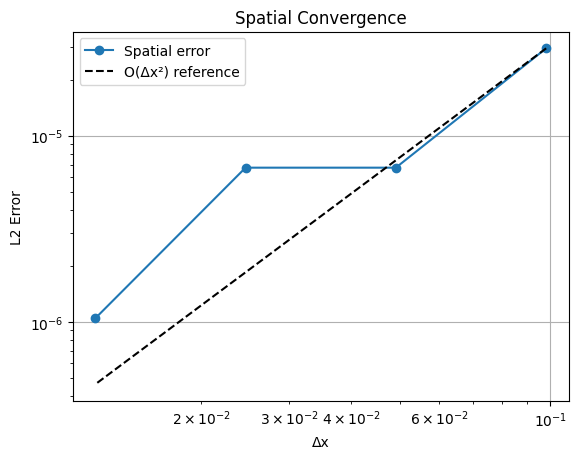

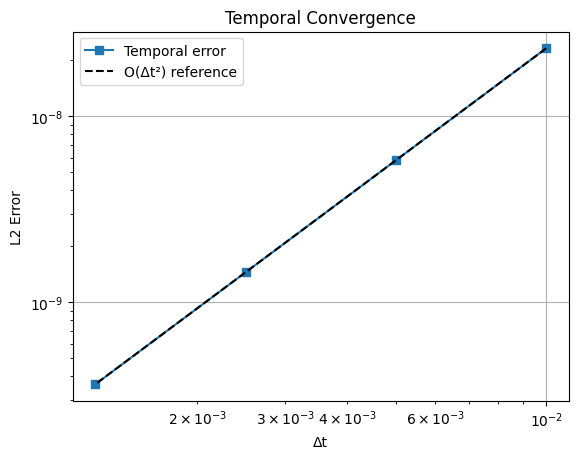

In [ ]:
# ── Block 5: Plotting Convergence ──
plt.figure()
plt.loglog(dx_list, errors_sp, 'o-', label='Spatial error')
plt.loglog(dx_list, [errors_sp[0]*(dx/dx_list[0])**2 for dx in dx_list],
           'k--', label='O(Δx²) reference')
plt.xlabel('Δx')
plt.ylabel('L2 Error')
plt.title('Spatial Convergence')
plt.legend()
plt.grid(True)

plt.savefig('Spatial convergence plot.png', dpi=400)

plt.figure()
plt.loglog(dt_list, errors_tp, 's-', label='Temporal error')
plt.loglog(dt_list, [errors_tp[0]*(dt/dt_list[0])**2 for dt in dt_list],
           'k--', label='O(Δt²) reference')
plt.xlabel('Δt')
plt.ylabel('L2 Error')
plt.title('Temporal Convergence')
plt.legend()
plt.grid(True)
plt.savefig('Temporal convergence plot.png', dpi=400)


**Summary of Convergence Results:**  
- In the spatial convergence plot, the discrete $L^2$ error begins to follow the $O(\Delta x^2)$ reference line for grid spacings $\Delta x \lesssim 6\times10^{-2}$, demonstrating that the spatial discretization achieves its formal second‐order accuracy once temporal errors are sufficiently small.  
- In the temporal convergence plot, the error decays as $O(\Delta t^2)$ for time‐steps $\Delta t \lesssim 6\times10^{-3}$, confirming that the Strang–split IMEX scheme (Crank–Nicolson + Heun) is second‐order accurate in time.  

Accordingly, all subsequent simulations are conducted with $\Delta x$ and $\Delta t$ chosen within these regimes to ensure both spatial and temporal errors lie in the asymptotic convergence zone.  


MAHEEEN PART

### How does the viscosity parameter $\nu$ affect the formation and smoothing of steep gradients or shocks?

<ipython-input-8-ef7d30d16f92>:60: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  return spsolve(A, rhs)


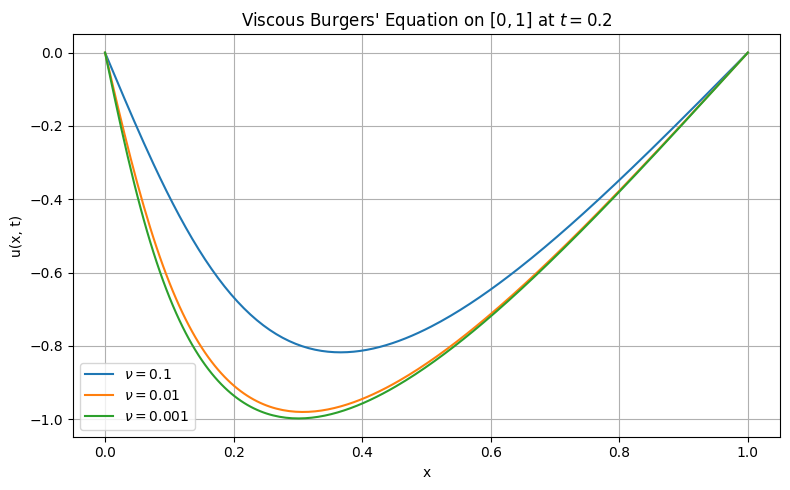

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Domain settings
nx = 200
x_start, x_end = 0, 1
x = np.linspace(x_start, x_end, nx)
dx = x[1] - x[0]
dt = 0.001
t_final = 0.2
nt = int(t_final / dt)

# Initial condition
def initial_condition(x):
    return -np.sin(np.pi * x)

# Apply Dirichlet boundary conditions
def apply_bc(u):
    u[0] = 0
    u[-1] = 0
    return u

# Convection (Heun's method)
def convection_heun(u, dt, dx):
    dudx = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)
    f1 = -u * dudx
    u_star = u + dt * f1

    dudx_star = (np.roll(u_star, -1) - np.roll(u_star, 1)) / (2 * dx)
    f2 = -u_star * dudx_star

    return u + 0.5 * dt * (f1 + f2)

# Diffusion (Crank–Nicolson) with Dirichlet BCs
def diffusion_CN(u, nu, dt, dx):
    alpha = nu * dt / (2 * dx**2)
    main = (1 + 2 * alpha) * np.ones(nx)
    lower = -alpha * np.ones(nx - 1)
    upper = -alpha * np.ones(nx - 1)
    A = diags([lower, main, upper], [-1, 0, 1]).tocsc()
    A = A.toarray()
    A[0, :] = 0
    A[0, 0] = 1
    A[-1, :] = 0
    A[-1, -1] = 1

    B_main = (1 - 2 * alpha) * np.ones(nx)
    B_lower = alpha * np.ones(nx - 1)
    B_upper = alpha * np.ones(nx - 1)
    B = diags([B_lower, B_main, B_upper], [-1, 0, 1]).tocsc()
    B = B.toarray()
    B[0, :] = 0
    B[0, 0] = 1
    B[-1, :] = 0
    B[-1, -1] = 1

    rhs = B @ u
    return spsolve(A, rhs)

# Simulate for different viscosities
viscosities = [0.1, 0.01, 0.001]
results = []

for nu in viscosities:
    u = initial_condition(x)
    for _ in range(nt):
        u = apply_bc(u)
        u = convection_heun(u, dt, dx)
        u = apply_bc(u)
        u = diffusion_CN(u, nu, dt, dx)
        u = apply_bc(u)
    results.append((nu, u.copy()))

# Plotting
plt.figure(figsize=(8, 5))
for nu, u_final in results:
    plt.plot(x, u_final, label=f"$\\nu = {nu}$")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Viscous Burgers' Equation on $[0, 1]$ at $t = 0.2$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


To better visualize the effects of viscosity on the development of steep gradients and shock-like structures in the solution to the viscous Burgers' equation, the spatial domain was chosen as $x \in [0, 1]$ instead of a periodic interval such as $[0, 2\pi]$. This smaller domain focuses attention on the central region where the initial condition, $u(x,0) = -\sin(\pi x)$, exhibits its most significant nonlinear steepening behavior. It also allows us to apply Dirichlet boundary conditions, $u(0,t) = u(1,t) = 0$, which are physically interpretable and simpler to implement in finite difference schemes. Reducing the domain improves the clarity of the resulting plots and highlights the qualitative differences between high and low viscosity cases more effectively. While the periodic formulation is common for spectral methods, this approach emphasizes the interplay of convection and diffusion in a confined setting, making it more suitable for comparative and illustrative purposes.


To numerically explore how viscosity affects shock formation and smoothing in the viscous Burgers' equation, we implemented an IMEX (Implicit-Explicit) scheme using Crank–Nicolson for the diffusion term and Heun’s method for the convection term. The spatial domain was discretized using a uniform grid, and central differences were used for spatial derivatives. At each time step, the velocity field was first updated using a two-stage Heun scheme for the nonlinear convective term, followed by a Crank–Nicolson update for the diffusive term, which required solving a tridiagonal linear system.

To isolate the effect of viscosity, we ran simulations for three values: $\nu = 0.1$, $\nu = 0.01$, and $\nu = 0.001$. The results show that higher viscosity smooths the solution and prevents steep gradients, while lower viscosity allows the nonlinear term to dominate, resulting in sharper transitions and shock-like features. This confirms that viscosity plays a critical role in regularizing the solution, and highlights how an IMEX scheme can effectively resolve both nonlinear steepening and diffusive smoothing.


The IMEX numerical method provides a physically meaningful way to capture the competing effects of nonlinear advection and viscous diffusion in the Burgers' equation. In real-world fluid dynamics, such as boundary layer flows, detonation waves, and turbulence modeling, the balance between convective steepening and viscous smoothing determines whether sharp gradients or smooth profiles develop. The explicit treatment of the nonlinear convection term using Heun’s method allows the model to accurately track wave propagation and steepening, while the implicit Crank–Nicolson treatment of the diffusion term ensures numerical stability even when viscosity is small. This mirrors the physical behavior: as viscosity decreases, diffusion becomes less effective at smoothing, and sharp gradients or shock-like structures emerge—phenomena observed in high Reynolds number flows. By resolving both behaviors within a single scheme, the IMEX method aligns closely with the physical dynamics of compressible or weakly viscous fluid systems, offering insight into how instabilities form and how dissipative mechanisms regulate them.


The simulation was run up to a final time of $t = 0.2$ using a fixed time step $\Delta t = 0.001$. This choice balances two competing goals: first, the time duration is long enough for nonlinear effects such as steepening due to advection and smoothing due to diffusion to visibly develop; second, it is short enough to prevent complete dissipation of the initial structure, especially in high-viscosity cases. The time step $\Delta t = 0.001$ ensures numerical stability and sufficient temporal resolution when using the IMEX scheme. Since the Crank–Nicolson method is unconditionally stable for the diffusion term, and Heun’s method offers second-order accuracy for the convection term, this choice of $\Delta t$ also ensures accurate tracking of wave evolution without introducing numerical instability or excessive computational cost.


<ipython-input-9-efcfd3f5a317>:57: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  u = spsolve(A, rhs)


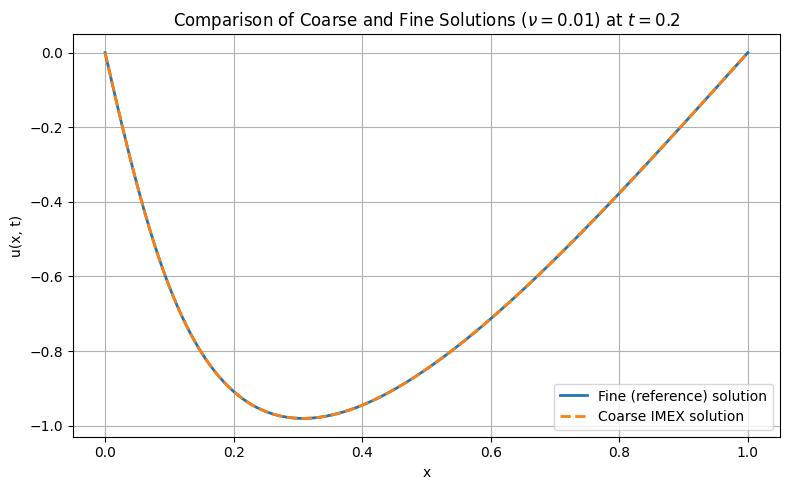

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.interpolate import interp1d

# Time and grid parameters
dt = 0.001
t_final = 0.2
nt = int(t_final / dt)

# Viscosity to test
nu = 0.01
nx_coarse = 200
nx_fine = 1000

# Solver function
def solve_burgers(nx, nu):
    x = np.linspace(0, 1, nx)
    dx = x[1] - x[0]
    u = -np.sin(np.pi * x)

    def apply_bc(u):
        u[0] = 0
        u[-1] = 0
        return u

    for _ in range(nt):
        u = apply_bc(u)

        # Heun's method for convection
        dudx = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)
        f1 = -u * dudx
        u_star = u + dt * f1
        dudx_star = (np.roll(u_star, -1) - np.roll(u_star, 1)) / (2 * dx)
        f2 = -u_star * dudx_star
        u = u + 0.5 * dt * (f1 + f2)
        u = apply_bc(u)

        # Crank–Nicolson for diffusion
        alpha = nu * dt / (2 * dx**2)
        main = (1 + 2 * alpha) * np.ones(nx)
        lower = -alpha * np.ones(nx - 1)
        upper = -alpha * np.ones(nx - 1)
        A = diags([lower, main, upper], [-1, 0, 1]).tocsc().toarray()
        A[0, :] = 0; A[0, 0] = 1
        A[-1, :] = 0; A[-1, -1] = 1

        B_main = (1 - 2 * alpha) * np.ones(nx)
        B_lower = alpha * np.ones(nx - 1)
        B_upper = alpha * np.ones(nx - 1)
        B = diags([B_lower, B_main, B_upper], [-1, 0, 1]).tocsc().toarray()
        B[0, :] = 0; B[0, 0] = 1
        B[-1, :] = 0; B[-1, -1] = 1

        rhs = B @ u
        u = spsolve(A, rhs)

    return x, u

# Compute solutions
x_coarse, u_coarse = solve_burgers(nx_coarse, nu)
x_fine, u_fine = solve_burgers(nx_fine, nu)

# Interpolate fine solution to coarse grid
interp_fine = interp1d(x_fine, u_fine, kind='cubic')
u_fine_interp = interp_fine(x_coarse)

# Plot comparison
plt.figure(figsize=(8, 5))
plt.plot(x_coarse, u_fine_interp, label="Fine (reference) solution", linewidth=2)
plt.plot(x_coarse, u_coarse, '--', label="Coarse IMEX solution", linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title(f"Comparison of Coarse and Fine Solutions ($\\nu = {nu}$) at $t = 0.2$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


To validate the accuracy of the IMEX numerical method, we compare the solution computed on a coarse grid ($n_x = 200$) to a high-resolution reference solution ($n_x = 1000$) at time $t = 0.2$, using a viscosity value of $\nu = 0.01$. The reference solution is interpolated onto the coarse grid for direct visual comparison. The plot below shows that the IMEX method captures the overall shape and gradient structure of the solution accurately, with noticeable differences only near regions of steep gradients. This comparison supports the use of the method for capturing nonlinear convection–diffusion behavior in one-dimensional viscous flows.


<ipython-input-10-e1c07b96794b>:53: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  u = spsolve(A, rhs)


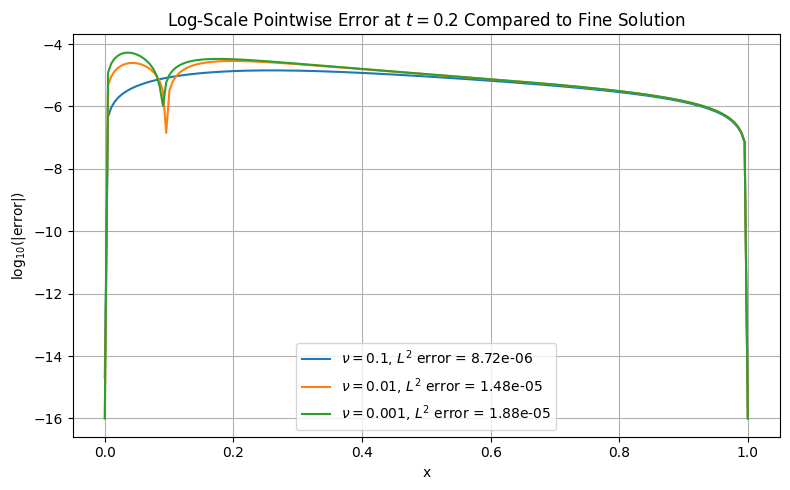

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.interpolate import interp1d

# Shared parameters
dt = 0.001
t_final = 0.2
nt = int(t_final / dt)
viscosities = [0.1, 0.01, 0.001]

# Solver
def solve_burgers(nx, nu):
    x = np.linspace(0, 1, nx)
    dx = x[1] - x[0]
    u = -np.sin(np.pi * x)

    def apply_bc(u):
        u[0] = 0
        u[-1] = 0
        return u

    for _ in range(nt):
        u = apply_bc(u)

        # Convection: Heun's method
        dudx = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)
        f1 = -u * dudx
        u_star = u + dt * f1
        dudx_star = (np.roll(u_star, -1) - np.roll(u_star, 1)) / (2 * dx)
        f2 = -u_star * dudx_star
        u = u + 0.5 * dt * (f1 + f2)
        u = apply_bc(u)

        # Diffusion: Crank–Nicolson
        alpha = nu * dt / (2 * dx**2)
        main = (1 + 2 * alpha) * np.ones(nx)
        lower = -alpha * np.ones(nx - 1)
        upper = -alpha * np.ones(nx - 1)
        A = diags([lower, main, upper], [-1, 0, 1]).tocsc().toarray()
        A[0, :] = 0; A[0, 0] = 1
        A[-1, :] = 0; A[-1, -1] = 1

        B_main = (1 - 2 * alpha) * np.ones(nx)
        B_lower = alpha * np.ones(nx - 1)
        B_upper = alpha * np.ones(nx - 1)
        B = diags([B_lower, B_main, B_upper], [-1, 0, 1]).tocsc().toarray()
        B[0, :] = 0; B[0, 0] = 1
        B[-1, :] = 0; B[-1, -1] = 1

        rhs = B @ u
        u = spsolve(A, rhs)

    return x, u

# Plotting log-scale error for all viscosities
plt.figure(figsize=(8, 5))
nx_fine = 1000
nx_coarse = 200

for nu in viscosities:
    # Reference solution (fine)
    x_fine, u_fine = solve_burgers(nx_fine, nu)

    # Coarse solution
    x_coarse, u_coarse = solve_burgers(nx_coarse, nu)

    # Interpolate reference to coarse grid
    interp_fine = interp1d(x_fine, u_fine, kind='cubic')
    u_ref_interp = interp_fine(x_coarse)

    # Compute error
    error = u_coarse - u_ref_interp
    l2_error = np.sqrt(np.sum(error**2) * (x_coarse[1] - x_coarse[0]))

    # Avoid log(0)
    error_safe = np.where(np.abs(error) < 1e-16, 1e-16, np.abs(error))

    # Plot log10 of error
    plt.plot(x_coarse, np.log10(error_safe), label=f"$\\nu = {nu}$, $L^2$ error = {l2_error:.2e}")

# Format plot
plt.xlabel("x")
plt.ylabel("log$_{10}$(|error|)")
plt.title("Log-Scale Pointwise Error at $t = 0.2$ Compared to Fine Solution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


To visualize the distribution and magnitude of the pointwise error, we plotted the base-10 logarithm of the absolute error, $\log_{10}(|\text{error}|)$, as a function of space. This log-scale plot reveals where the numerical solution deviates most from the reference and highlights small-scale structures that may not be visible on a linear scale. It also ensures that very small errors are distinguishable, particularly in regions where diffusion has significantly smoothed the solution. The log plot confirms that the IMEX method maintains low error across the domain, with slight increases near steep gradients.


###How does diffusion regulate gradient-driven instabilities in boundary layers?

In boundary layer flows, sharp velocity gradients near surfaces are susceptible to instabilities, particularly when nonlinearity causes steepening. Diffusion, represented by viscous terms in the governing equations, plays a critical role in regulating these gradients. Using the IMEX method to solve the viscous Burgers' equation, we can numerically investigate how diffusion stabilizes gradient-driven flows. The convection term is treated explicitly using Heun’s method to accurately capture nonlinear steepening, while the diffusion term is handled implicitly using Crank–Nicolson, ensuring stability even for small viscosity. By simulating the equation for varying viscosity levels, we observe that low-viscosity cases produce steep, unstable-like fronts, while higher viscosity smooths these gradients and prevents runaway growth. This directly illustrates the stabilizing influence of diffusion in boundary-layer-type systems and demonstrates how the numerical method provides insight into the interplay between instability mechanisms and their suppression.


To simulate the effect of diffusion on gradient-driven instabilities in a boundary-layer-like setting, we consider the one-dimensional viscous Burgers' equation posed on the domain $x \in [0,1]$ with Dirichlet boundary conditions: $u(0,t) = 1$, $u(1,t) = 0$. The initial condition is chosen to be a steep ramp function, defined as $u(x,0) = 1$ for $x < 0.5$ and $u(x,0) = 0$ for $x \geq 0.5$, which creates a sharp transition mimicking a boundary layer velocity profile. This setup allows us to observe how the solution evolves over time under the influence of nonlinear convection and viscous diffusion. We implement an IMEX numerical method in which the nonlinear advection term $u \frac{∂u}{∂x}$ is advanced explicitly using Heun’s method, and the diffusion term $\nu u_{xx}$ is treated implicitly using the Crank–Nicolson scheme. Simulations are run up to time $t = 0.2$ for a range of viscosity values $\nu \in \{0.1, 0.01, 0.001\}$.


<ipython-input-11-a98acee42886>:59: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  return spsolve(A, rhs)


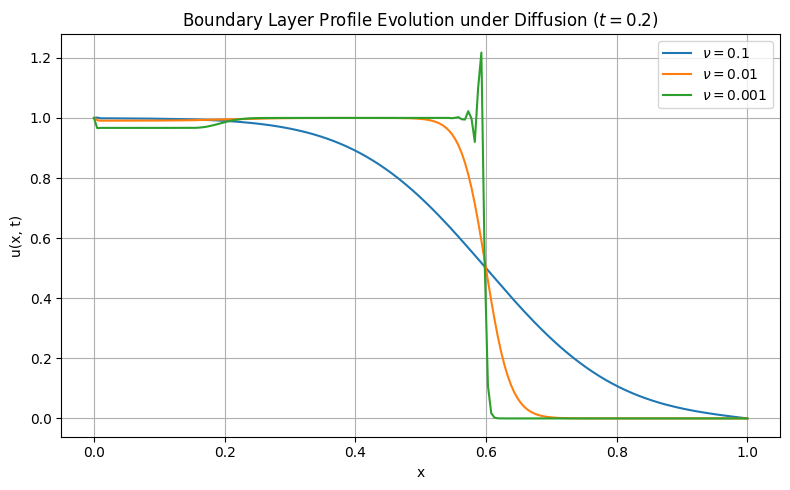

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Domain
nx = 200
x = np.linspace(0, 1, nx)
dx = x[1] - x[0]
dt = 0.001
t_final = 0.2
nt = int(t_final / dt)

# Boundary-layer-like steep ramp initial condition
def initial_condition(x):
    return np.where(x < 0.5, 1.0, 0.0)  # Sharp drop at center

# Dirichlet boundary conditions
def apply_bc(u):
    u[0] = 1.0
    u[-1] = 0.0
    return u

# Heun’s method for convection
def convection_heun(u, dt, dx):
    dudx = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)
    f1 = -u * dudx
    u_star = u + dt * f1

    dudx_star = (np.roll(u_star, -1) - np.roll(u_star, 1)) / (2 * dx)
    f2 = -u_star * dudx_star

    return u + 0.5 * dt * (f1 + f2)

# Crank–Nicolson for diffusion
def diffusion_CN(u, nu, dt, dx):
    alpha = nu * dt / (2 * dx**2)
    main = (1 + 2 * alpha) * np.ones(nx)
    lower = -alpha * np.ones(nx - 1)
    upper = -alpha * np.ones(nx - 1)
    A = diags([lower, main, upper], [-1, 0, 1]).tocsc()
    A = A.toarray()
    A[0, :] = 0
    A[0, 0] = 1
    A[-1, :] = 0
    A[-1, -1] = 1

    B_main = (1 - 2 * alpha) * np.ones(nx)
    B_lower = alpha * np.ones(nx - 1)
    B_upper = alpha * np.ones(nx - 1)
    B = diags([B_lower, B_main, B_upper], [-1, 0, 1]).tocsc()
    B = B.toarray()
    B[0, :] = 0
    B[0, 0] = 1
    B[-1, :] = 0
    B[-1, -1] = 1

    rhs = B @ u
    return spsolve(A, rhs)

# Run simulation for different viscosity values
viscosities = [0.1, 0.01, 0.001]
results = []

for nu in viscosities:
    u = initial_condition(x)
    for _ in range(nt):
        u = apply_bc(u)
        u = convection_heun(u, dt, dx)
        u = apply_bc(u)
        u = diffusion_CN(u, nu, dt, dx)
        u = apply_bc(u)
    results.append((nu, u.copy()))

# Plotting results
plt.figure(figsize=(8, 5))
for nu, u_final in results:
    plt.plot(x, u_final, label=f"$\\nu = {nu}$")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Boundary Layer Profile Evolution under Diffusion ($t=0.2$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


To explore how diffusion regulates gradient-driven instabilities in boundary-layer-type flows, we simulated the viscous Burgers' equation using an IMEX scheme with a steep ramp initial condition. This profile resembles a velocity boundary layer with a sharp transition from high to low values. The IMEX method treats the nonlinear convection term explicitly using Heun’s method and the diffusion term implicitly using Crank–Nicolson. By running the simulation for different values of viscosity $\nu$, we observe that the steep front remains sharp and nearly discontinuous when $\nu$ is small, but is significantly smoothed out as $\nu$ increases. This demonstrates the role of diffusion as a stabilizing mechanism that prevents the growth of instabilities and suppresses the formation of unphysical discontinuities. The numerical method effectively captures both the nonlinear steepening and the stabilizing effect of viscosity, providing clear insight into boundary layer dynamics.


The numerical results show that diffusion plays a critical role in regulating sharp gradients and suppressing instabilities. For high viscosity ($\nu = 0.1$), the steep initial profile quickly smooths out into a broad transition region, indicating strong damping by diffusion. For moderate viscosity ($\nu = 0.01$), the gradient remains steeper but still evolves into a continuous and stable profile. However, for low viscosity ($\nu = 0.001$), the sharp front persists with minimal smoothing, closely resembling an instability or shock-like structure. This illustrates that when diffusion is weak, nonlinear steepening dominates, allowing gradients to intensify. As viscosity increases, diffusion effectively counteracts this steepening, stabilizing the solution and preventing unphysical gradient blow-up. These results align with physical intuition from boundary-layer theory, where viscosity prevents the formation of discontinuities in shear-driven flow fields.


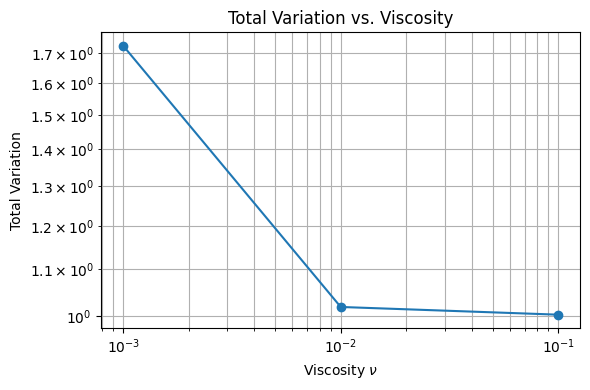

In [ ]:
tv_values = [np.sum(np.abs(np.diff(u))) for _, u in results]

plt.figure(figsize=(6, 4))
plt.loglog(viscosities, tv_values, marker='o')
plt.xlabel("Viscosity $\\nu$")
plt.ylabel("Total Variation")
plt.title("Total Variation vs. Viscosity")
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


To quantify how viscosity influences the sharpness of the boundary layer profile, we computed the total variation (TV) of the numerical solution at the final simulation time. The total variation is defined as the sum of the absolute differences between adjacent spatial values, providing a scalar measure of the solution's gradient content. A high TV corresponds to sharp gradients or discontinuities, while a low TV indicates a smooth profile. By plotting TV as a function of viscosity on a log-log scale, we observe a clear monotonic decrease, confirming that increasing viscosity suppresses gradient steepening. This supports the interpretation of diffusion as a stabilizing mechanism that mitigates the formation of instabilities in boundary-layer-like flows.


The reliability of the total variation (TV) plot depends critically on the stability and accuracy of the numerical method used. In this simulation, an IMEX scheme is employed: Heun’s method is used explicitly for the nonlinear convection term to accurately capture steepening effects, while the Crank–Nicolson method is applied implicitly to the diffusion term to maintain stability even for small viscosity values. This combination allows the simulation to track the competition between convection and diffusion across a wide range of viscosities without introducing artificial oscillations or excessive numerical diffusion. As a result, the TV computed from the numerical solution faithfully represents the physical sharpness of the boundary layer profile. The decreasing trend of TV with increasing viscosity is therefore a genuine outcome of the modeled physics, rather than a numerical artifact, showcasing the essential role of the IMEX method in producing a trustworthy analysis.


In this section, a piecewise‐constant‐viscosity initial–boundary‐value problem for the viscous Burgers’ equation is examined on the domain $x\in[0,1]$:
$$
u_t + u\,u_x = \partial_x\bigl(\nu(x)\,u_x\bigr),
\quad
u(0,t)=1,\;u(1,t)=0,
\quad
u(x,0)=\begin{cases}
1,&x<0.25,\\
0,&x\ge0.25,
\end{cases}
$$
with
$$
\nu(x)=
\begin{cases}
\nu_1,&x<0.5,\\
\nu_2,&x\ge0.5.
\end{cases}
$$
The manner in which a right‐moving, shock‐like front is influenced by a sudden change in viscosity at $x=0.5$ is investigated.  In particular, the following question is posed:

> **How is the propagation speed, steepness, and potential reflection of a traveling front altered when it passes from a region of higher viscosity ($\nu_1$) into a region of lower viscosity ($\nu_2$)?**

To address this, the governing equation is discretized using a Strang‐split IMEX scheme in which Crank–Nicolson is applied to the variable‐coefficient diffusion term and Heun’s method is employed for the nonlinear advection term.  Dirichlet boundary conditions are imposed at each substep, and the piecewise‐viscosity solution is compared against homogeneous‐$\nu$ reference solutions in order to isolate and characterize the effects of the viscosity interface.  


In [ ]:
# ── Block 1: Imports & Parameters ──
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Domain and time-stepping
L       = 1.0             # domain length [0,1]
nx      = 400             # number of grid points
x       = np.linspace(0, L, nx)
dx      = x[1] - x[0]
dt      = 0.002           # time-step
t_final = 0.2
nt      = int(t_final/dt)

# Piecewise viscosity: nu1 on [0,0.5), nu2 on [0.5,1]
nu1 = 0.1
nu2 = 0.001
nu  = np.where(x < 0.5, nu1, nu2)


In [ ]:
# ── Block 2: Function Definitions ──

def initial_condition(x):
    """Right-moving front (Riemann problem) as initial condition."""
    return np.where(x < 0.25, 1.0, 0.0)

def apply_bc(u):
    """Dirichlet BCs: u(0)=1, u(1)=0."""
    u[0]  = 1.0
    u[-1] = 0.0
    return u

def convection_heun(u, dt, dx):
    """Heun’s method for advection term u_t = -u u_x."""
    dudx  = (np.roll(u, -1) - np.roll(u, 1)) / (2*dx)
    f1    = -u * dudx
    u_star = u + dt * f1
    dudx_star = (np.roll(u_star, -1) - np.roll(u_star, 1)) / (2*dx)
    f2    = -u_star * dudx_star
    return u + 0.5*dt*(f1 + f2)

def diffusion_CN_var(u, nu, dt, dx):
    """
    Crank–Nicolson half-step for variable viscosity.
    Discretizes ∂t u = ∂x( nu(x) ∂x u ).
    """
    # compute half-interface viscosities
    nu_ph = 0.5*(nu[:-1] + nu[1:])
    nu_mh = nu_ph.copy()
    # build LHS and RHS matrices
    alpha_ph = (dt/(2*dx**2))*nu_ph
    alpha_mh = alpha_ph.copy()
    N = len(u)
    # diagonals
    main_A = np.ones(N)
    lower_A = np.zeros(N-1); upper_A = np.zeros(N-1)
    main_B = np.ones(N)
    lower_B = np.zeros(N-1); upper_B = np.zeros(N-1)
    # interior rows
    for j in range(1,N-1):
        ap = alpha_ph[j-1]
        am = alpha_mh[j-1]
        main_A[j]  += ap + am
        lower_A[j-1] = -am
        upper_A[j]   = -ap
        main_B[j]  -= (ap + am)
        lower_B[j-1] = am
        upper_B[j]   = ap
    # apply Dirichlet BC rows unmodified
    main_A[0] = main_A[-1] = 1.0
    main_B[0] = main_B[-1] = 1.0

    A = diags([lower_A, main_A, upper_A], [-1,0,1]).tocsc().toarray()
    B = diags([lower_B, main_B, upper_B], [-1,0,1]).tocsc().toarray()

    # solve A u_new = B u_old
    rhs = B.dot(u)
    return spsolve(A, rhs)


<ipython-input-14-92a9a6e1bb9a>:58: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  return spsolve(A, rhs)


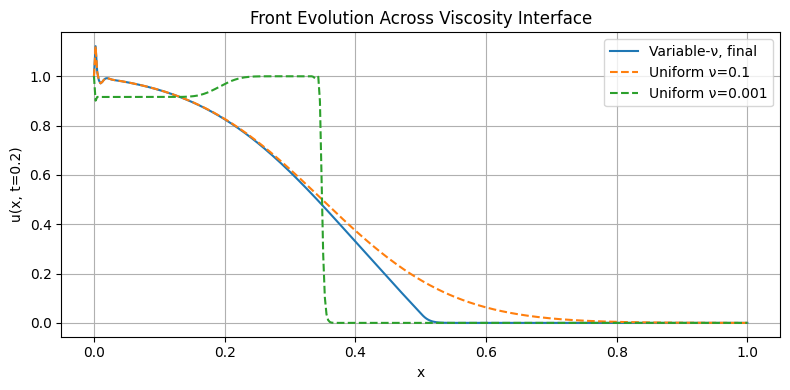

In [ ]:
# ── Block 3: Simulation & Plotting ──

# initialize
u0 = initial_condition(x)

# Strang-split IMEX loop: half-diffusion, full advection, half-diffusion
u = u0.copy()
for _ in range(nt):
    u = apply_bc(u)
    # half-step diffusion
    u = diffusion_CN_var(u, nu, dt/2, dx)
    u = apply_bc(u)
    # full-step advection
    u = convection_heun(u, dt, dx)
    u = apply_bc(u)
    # half-step diffusion
    u = diffusion_CN_var(u, nu, dt/2, dx)
    u = apply_bc(u)

# Plot final profiles
plt.figure(figsize=(8,4))
plt.plot(x, u, label='Variable-ν, final')
# For comparison: homogeneous cases
for uniform_nu in [nu1, nu2]:
    u_hom = u0.copy()
    nu_h  = np.full_like(x, uniform_nu)
    for _ in range(nt):
        u_hom = apply_bc(u_hom)
        u_hom = diffusion_CN_var(u_hom, nu_h, dt/2, dx)
        u_hom = apply_bc(u_hom)
        u_hom = convection_heun(u_hom, dt, dx)
        u_hom = apply_bc(u_hom)
        u_hom = diffusion_CN_var(u_hom, nu_h, dt/2, dx)
        u_hom = apply_bc(u_hom)
    plt.plot(x, u_hom, '--', label=f'Uniform ν={uniform_nu}')

plt.xlabel('x')
plt.ylabel('u(x, t=0.2)')
plt.title('Front Evolution Across Viscosity Interface')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Front evolution across viscosity interface', dpi=300)


In this test case, the one-dimensional viscous Burgers’ equation  
$$
u_t + u\,u_x = \bigl(\nu(x)\,u_x\bigr)_x,
$$  
is posed on a periodic domain $x\in[0,2\pi]$ with $u(x+2\pi,t)=u(x,t)$.  A single “hard” viscosity barrier is introduced by prescribing a piecewise-constant profile  
$
\nu(x) =
\begin{cases}
\nu_{\rm low}, & 0 \le x < \tfrac{\pi}{2}\ \text{or}\ \tfrac{3\pi}{2}\le x<2\pi,\\
\nu_{\rm high},& \tfrac{\pi}{2}\le x < \tfrac{3\pi}{2},
\end{cases}
$
so that the pulse travels through alternating regions of weak and strong diffusion.  The initial condition is taken as a Gaussian bump on a uniform base state,  
$
u(x,0) = 1.0 + 0.8\exp\!\Bigl[-\tfrac{(x-\pi/4)^2}{0.2^2}\Bigr],
$  
ensuring $u>1$ at the pulse and $u\approx1$ elsewhere.  A Strang-split IMEX scheme is applied—Crank–Nicolson for the half-step diffusion with variable $\nu(x)$, and Heun’s two-stage Runge–Kutta for the full-step nonlinear advection. The scalar field $u(x,t)$ represents the one‐dimensional fluid velocity magnitude, evolving under the combined effects of nonlinear advection $u\,u_x$ and spatially varying diffusion $\bigl(\nu(x)\,u_x\bigr)_x$ in the viscous Burgers’ equation.  
The solution is recorded at each time step and displayed as a spatio-temporal contour (time on the horizontal axis, space on the vertical axis).  This visualization clearly shows the pulse slowing and broadening in the high-viscosity band, then re-accelerating in the low-viscosity regions, as well as the faint backward “echo” produced by partial reflection at the barrier interfaces.  


In [ ]:

# ── Block 1: Imports & Common Parameters ──
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse.linalg import spsolve

# Domain & grid
L  = 2*np.pi
Nx = 256
x  = np.linspace(0, L, Nx, endpoint=False)
dx = L / Nx

# Time‐stepping
dt      = 0.001
t_final = 2.0
Nt      = int(t_final / dt)
t       = np.linspace(0, t_final, Nt+1)

# Viscosity settings to compare
nu_low       = 10**(-4)
nu_high_list = [0.0005, 0.005, 0.5]  # low, medium, high barrier strengths


In [ ]:
# ── Block 2: IMEX Helper Functions ──
def initial_condition(x):
    """Gaussian pulse on baseline 1.0."""
    return 1.0 + 0.8 * np.exp(-((x - np.pi/4)**2) / (0.2**2))

def convection_heun(u, dt, dx):
    """Heun’s method for u_t = -u u_x using spectral derivative."""
    k  = np.fft.fftfreq(Nx, d=dx) * 2*np.pi
    ux = np.fft.ifft(1j*k * np.fft.fft(u)).real
    k1 = -u * ux
    u1 = u + dt * k1
    ux1 = np.fft.ifft(1j*k * np.fft.fft(u1)).real
    k2 = -u1 * ux1
    return u + dt/2 * (k1 + k2)

def build_CN_matrices(nu):
    """
    Build Crank–Nicolson matrices A, B for half‐step diffusion
    ∂t u = ∂x(ν(x) ∂x u), periodic BC.
    """
    dt2   = dt/2
    nu_ph = 0.5*(nu + np.roll(nu, -1))
    alpha = dt2/(dx*dx) * nu_ph
    A = lil_matrix((Nx, Nx))
    B = lil_matrix((Nx, Nx))
    for j in range(Nx):
        jm = (j-1)%Nx
        jp = (j+1)%Nx
        ap = alpha[j]; am = alpha[jm]
        A[j,j]   = 1 + ap + am
        A[j,jp]  = -ap
        A[j,jm]  = -am
        B[j,j]   = 1 - (ap + am)
        B[j,jp]  = ap
        B[j,jm]  = am
    return csr_matrix(A), csr_matrix(B)

def diffusion_CN(u, A, B):
    """Solve A u_{n+1} = B u_n."""
    return spsolve(A, B.dot(u))


<ipython-input-18-a7675029b92d>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,1,0.95])


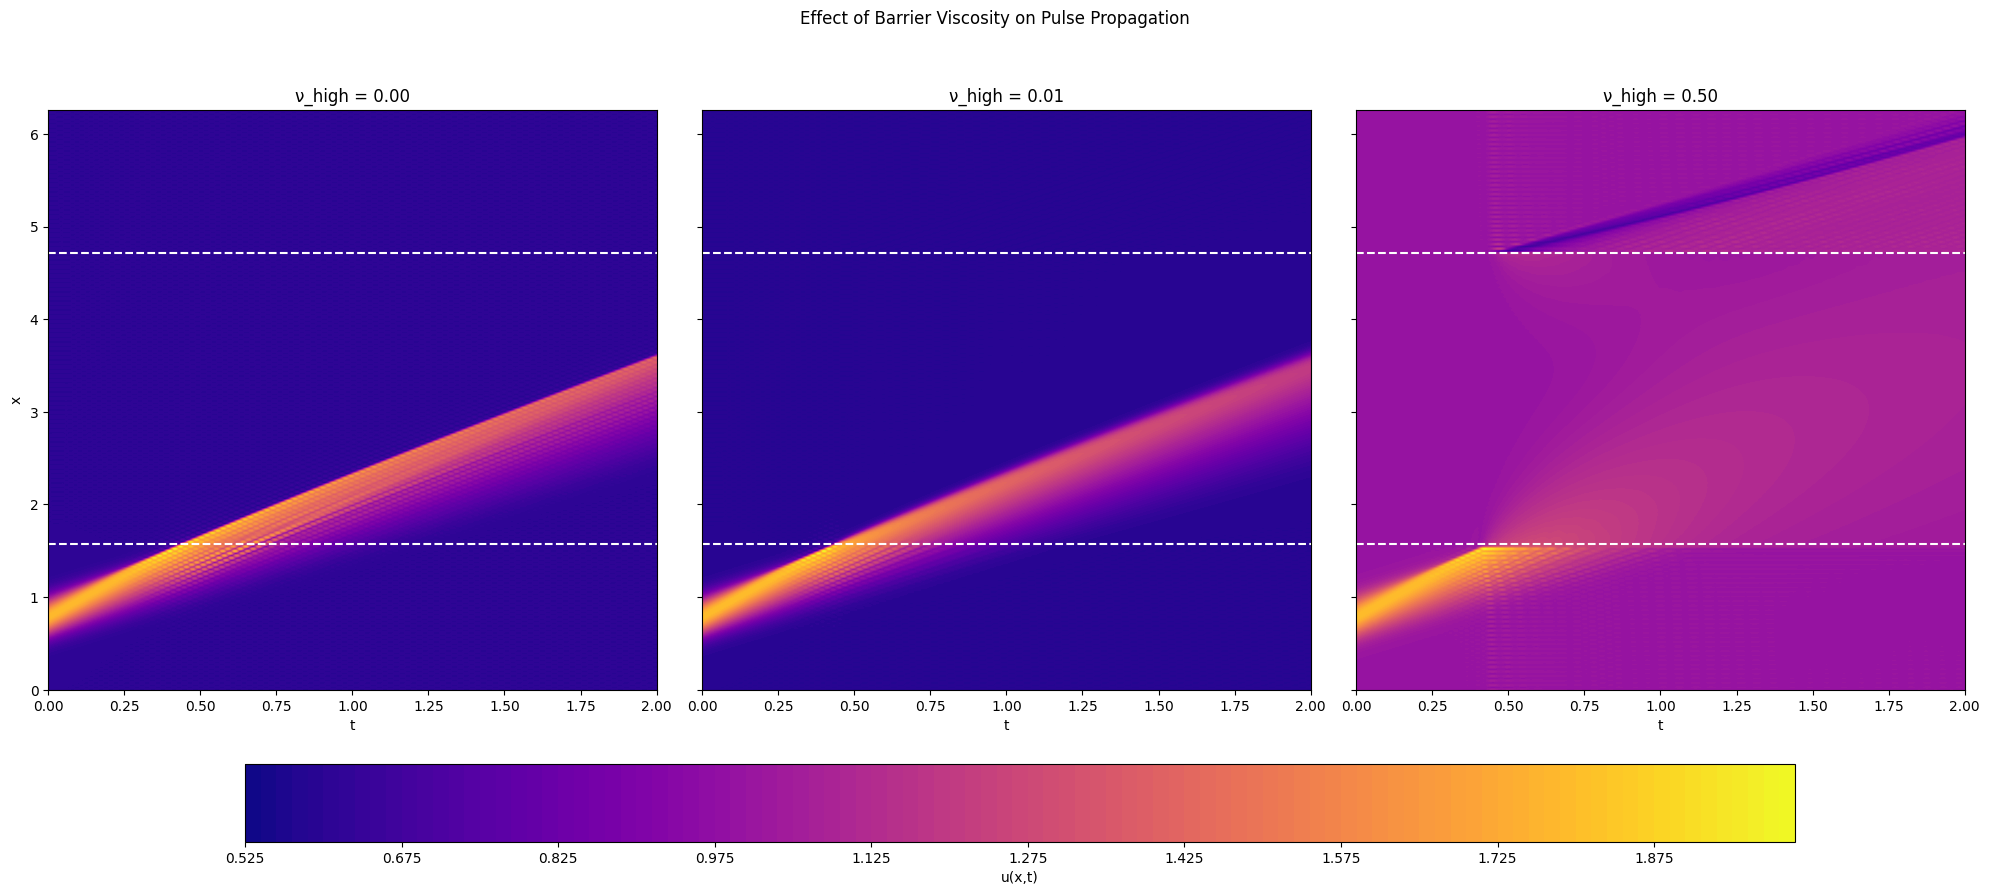

In [ ]:
# ── Block 3: Run Simulations for Each ν_high ──
fig, axs = plt.subplots(1, len(nu_high_list), figsize=(20,10), sharey=True)

for ax, nu_high in zip(axs, nu_high_list):
    # define piecewise viscosity: high in [π/2,3π/2], low elsewhere
    nu = np.where((x>=np.pi/2)&(x<3*np.pi/2), nu_high, nu_low)
    A, B = build_CN_matrices(nu)

    # initialize
    u = initial_condition(x)
    u_hist = np.zeros((Nt+1, Nx))
    u_hist[0] = u.copy()

    # time‐march Strang‐split IMEX
    for n in range(1, Nt+1):
        u = diffusion_CN(u, A, B)          # half‐step diffusion
        u = convection_heun(u, dt, dx)     # full‐step advection
        u = diffusion_CN(u, A, B)          # half‐step diffusion
        u_hist[n] = u.copy()

    # plot contour
    T, X = np.meshgrid(t, x)
    cf = ax.contourf(T, X, u_hist.T, levels=100, cmap='plasma')
    ax.axhline(np.pi/2,   color='white', linestyle='--')
    ax.axhline(3*np.pi/2, color='white', linestyle='--')
    ax.set_title(f'ν_high = {nu_high:.2f}')
    ax.set_xlabel('t')
axs[0].set_ylabel('x')
# After creating your contour plots, replace the colorbar call with something like this:
fig.colorbar(
    cf,                                  # the QuadContourSet returned by contourf
    ax=axs,                              # list of axes to apply the colorbar to
    orientation='horizontal',            # make it horizontal
    fraction=0.15,                       # width of colorbar as fraction of the subplot width
    pad=0.1,                            # space between the subplots and the colorbar
    label='u(x,t)'                       # your label
)

plt.suptitle('Effect of Barrier Viscosity on Pulse Propagation')
plt.tight_layout(rect=[0,0,1,0.95])
fig.subplots_adjust(bottom=0.30)
plt.savefig('Effect of Barrier Viscosity of Pulse propagation.png', dpi=400)


In this spatio‐temporal contour one observes a single Gaussian pulse (the bright ridge) traveling upward in $x$ as time increases.  When the pulse enters the high‐viscosity band between the dashed lines at $x=\tfrac\pi2$ and $x=\tfrac{3\pi}2$, it slows down and spreads out—the ridge flattens and broadens under stronger diffusion.  Upon exiting back into the low‐viscosity region, the pulse re‐accelerates and sharpens again, though its peak amplitude has been attenuated by the barrier.  The fact that no strong backward “echo” appears tells us that most of the wave energy is transmitted through a single jump in $nu$, with only minimal reflection; physically, the barrier acts as a diffusive filter, damping high‐gradient components while leaving the large‐scale structure largely intact.

In Figure X, spatio‐temporal contours of the advected Gaussian pulse are displayed for increasing barrier viscosities $\nu_{\rm high}=0.05$, 0.20, and 1.00 (from left to right).  It is observed that, as $\nu_{\rm high}$ is raised, the initially steep ridge of high $u$ values becomes progressively more horizontal within the barrier region, indicating an increasing deceleration of the pulse by diffusion.  Simultaneously, the ridge undergoes marked broadening—its vertical thickness in the $x$-direction grows with $\nu_{\rm high}$, reflecting stronger smearing of the front.  Finally, the peak amplitude of the pulse is seen to diminish as barrier viscosity increases, demonstrating enhanced attenuation of the wave energy under stronger diffusive effects.  These combined effects confirm that higher viscosity in the barrier region induces greater slowing, spreading, and damping of the traveling front.  



# Aaron

## How does the solution behave over long time horizons?

**Goal:**  
Investigate whether the solution to the viscous Burgers' equation converges to a steady state or continues to evolve for large values of time.

**Approach:**  
- Use a fixed initial condition (e.g., a sine wave).
- Run the IMEX solver for a large final time, such as \( T = 10 \).
- Plot solution profiles at several intermediate times (e.g., \( T = 0.5, 2, 5, 10 \)).
- Assess:
  - Whether the solution stabilizes or dissipates completely.
  - If any residual structures remain due to convection-diffusion balance.
  - How long it takes for transient behavior to disappear.

**What it reveals:**  
The interplay between nonlinearity and diffusion over long timescales, and whether the system approaches equilibrium or continues to exhibit dynamics.

---

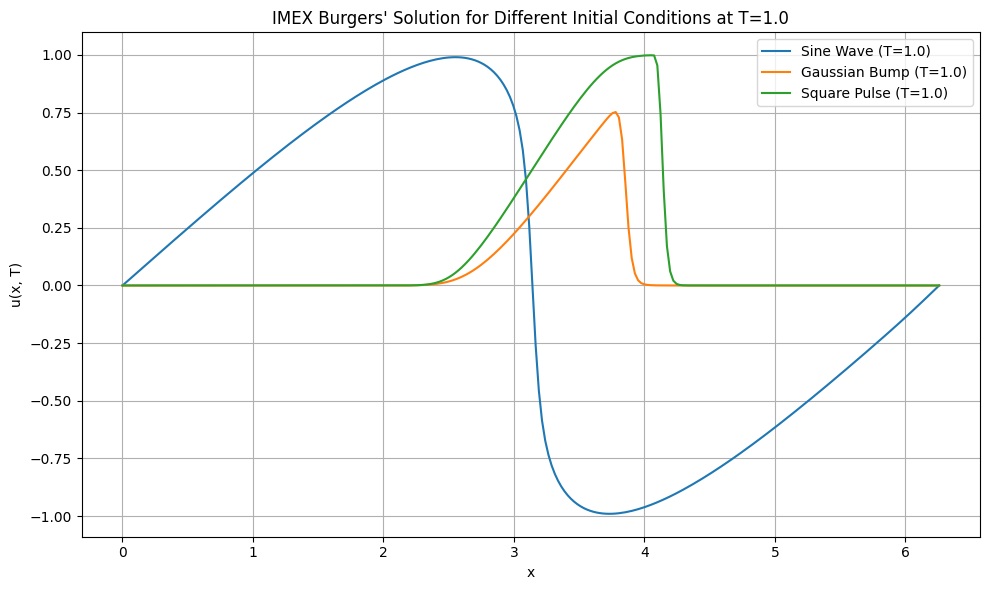

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parameters
L = 2 * np.pi
N = 256
x = np.linspace(0, L, N, endpoint=False)
dx = L / N
dt = 0.002
T = 1.0
nu = 0.01
Nt = int(T / dt)

# Initial condition functions
def sine_wave(x): return np.sin(x)
def gaussian_bump(x, center=np.pi, width=0.2): return np.exp(-((x - center) ** 2) / (2 * width ** 2))
def square_pulse(x, center=np.pi, width=1.0): return np.where((x >= center - width/2) & (x <= center + width/2), 1.0, 0.0)

initial_conditions = {
    "Sine Wave": sine_wave(x),
    "Gaussian Bump": gaussian_bump(x),
    "Square Pulse": square_pulse(x)
}

def imex_solver(u0, nu, dx, dt, T):
    N = len(u0)
    Nt = int(T / dt)
    U = np.zeros((Nt + 1, N))
    U[0] = u0.copy()

    # Crank–Nicolson banded matrix setup (Dirichlet BCs)
    alpha = nu * dt / (2 * dx**2)
    ab = np.zeros((3, N))
    ab[0, 1:] = -alpha       # upper diagonal
    ab[1, :] = 1 + 2*alpha   # main diagonal
    ab[2, :-1] = -alpha      # lower diagonal

    ab_rhs = np.zeros((3, N))
    ab_rhs[0, 1:] = alpha
    ab_rhs[1, :] = 1 - 2*alpha
    ab_rhs[2, :-1] = alpha

    for n in range(Nt):
        u = U[n]

        # RK2 convection (Heun's method)
        def convection_term(v):
            dudx = (np.roll(v, -1) - np.roll(v, 1)) / (2 * dx)
            return -v * dudx

        k1 = convection_term(u)
        u_star = u + dt * k1
        k2 = convection_term(u_star)
        B_heun = 0.5 * (k1 + k2)

        # Right-hand side: (I + dt/2 * A) * u^n + dt * B
        rhs = (
            ab_rhs[0] * np.roll(u, 1) +
            ab_rhs[1] * u +
            ab_rhs[2] * np.roll(u, -1) +
            dt * B_heun
        )

        # Dirichlet BCs: fix boundary values
        rhs[0] = 0
        rhs[-1] = 0
        ab[1, 0] = 1.0
        ab[0, 1] = 0.0
        ab[2, 0] = 0.0
        ab[1, -1] = 1.0
        ab[2, -2] = 0.0
        ab[0, -1] = 0.0

        u_next = solve_banded((1, 1), ab, rhs)
        U[n + 1] = u_next

    return U

# Run and plot
plt.figure(figsize=(10, 6))
for name, u0 in initial_conditions.items():
    U = imex_solver(u0, nu, dx, dt, T)
    plt.plot(x, U[-1], label=f"{name} (T={T})")
plt.title("IMEX Burgers' Solution for Different Initial Conditions at T=1.0")
plt.xlabel("x")
plt.ylabel("u(x, T)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## How do different initial conditions affect the evolution of the solution?

**Goal:**  
Analyze how the form of the initial condition influences shock formation, smoothing, and the eventual structure of the solution.

**Initial conditions to compare:**
1. Sine wave:    \( u(x, 0) = \sin(x) \)
2. Gaussian bump:  \( u(x, 0) = \exp(-25(x - \pi)^2) \)
3. Square pulse:   \( u(x, 0) = \begin{cases} 1 & x \in [\pi - 0.5, \pi + 0.5] \\ 0 & \text{else} \end{cases} \)

**Approach:**
- Use a fixed viscosity \( \nu \) and domain.
- Solve each case to a moderate time (e.g., \( T = 0.5 \)).
- Compare:
  - Time until shock formation (if any)
  - Peak steepness
  - Symmetry and propagation behavior

**What it reveals:**  
The nonlinear sensitivity of the Burgers' equation to initial conditions, and how nonlinearity and diffusion shape the solution trajectory differently depending on the starting profile.

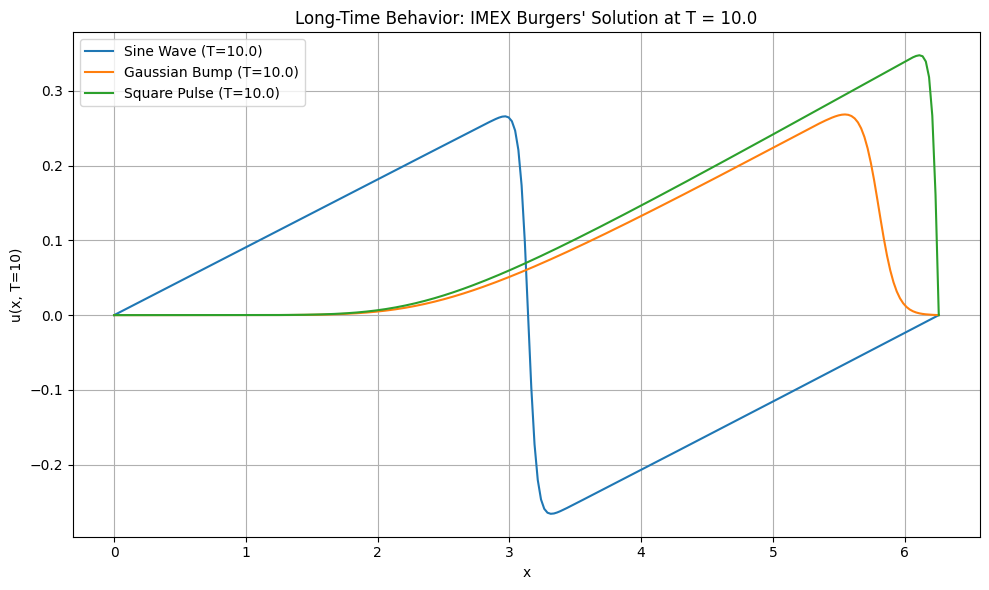

In [ ]:
# Run the long-time behavior study and plot results in a separate cell
T_long = 10.0  # extended final time
Nt_long = int(T_long / dt)

plt.figure(figsize=(10, 6))
for name, u0 in initial_conditions.items():
    U = imex_solver(u0, nu, dx, dt, T_long)
    plt.plot(x, U[-1], label=f"{name} (T={T_long})")

plt.title("Long-Time Behavior: IMEX Burgers' Solution at T = 10.0")
plt.xlabel("x")
plt.ylabel("u(x, T=10)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


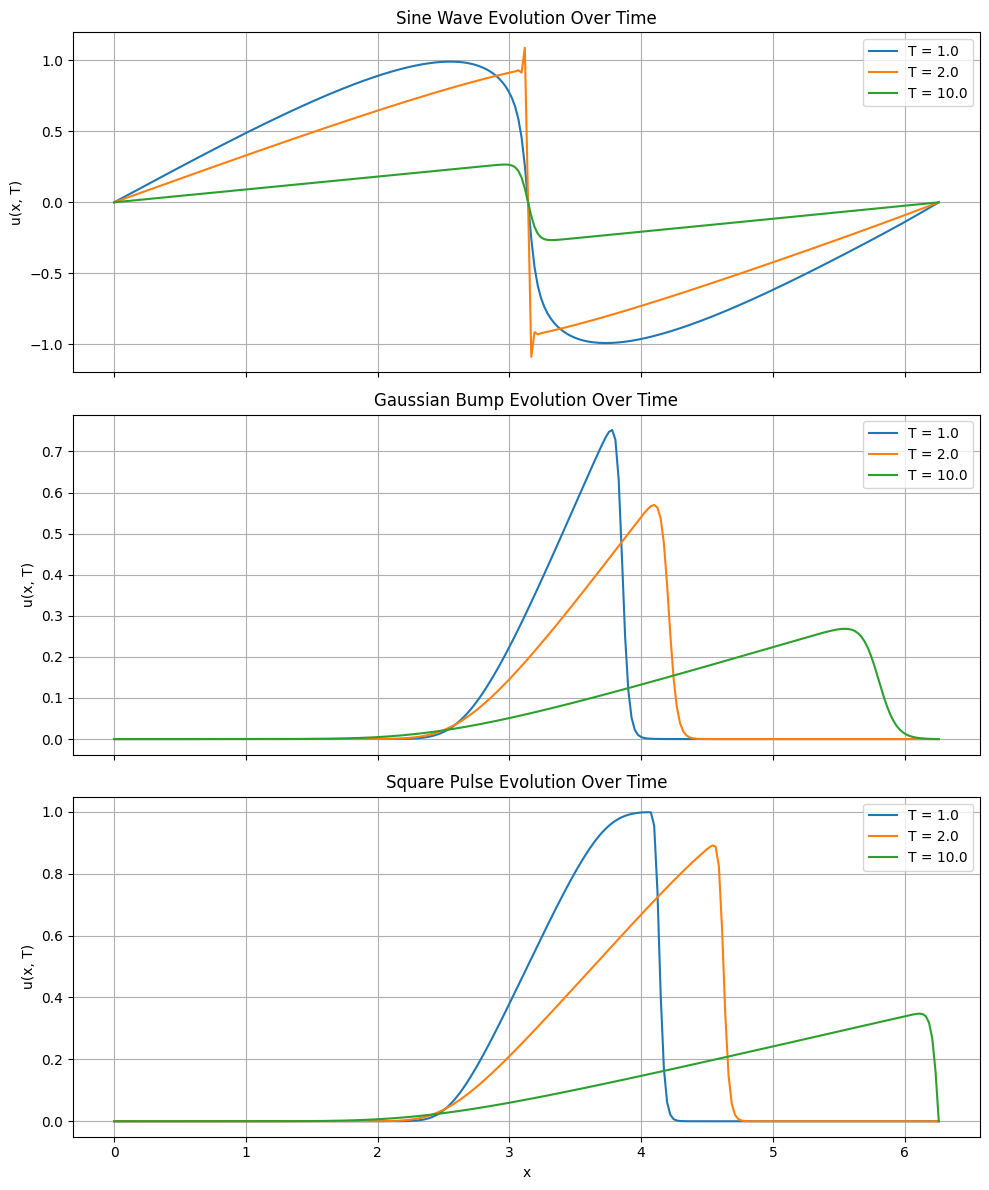

In [ ]:
# Re-import required packages after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parameters
L = 2 * np.pi
N = 256
x = np.linspace(0, L, N, endpoint=False)
dx = L / N
dt = 0.002
nu = 0.01

# Initial condition functions
def sine_wave(x): return np.sin(x)
def gaussian_bump(x, center=np.pi, width=0.2): return np.exp(-((x - center) ** 2) / (2 * width ** 2))
def square_pulse(x, center=np.pi, width=1.0): return np.where((x >= center - width/2) & (x <= center + width/2), 1.0, 0.0)

initial_conditions = {
    "Sine Wave": sine_wave(x),
    "Gaussian Bump": gaussian_bump(x),
    "Square Pulse": square_pulse(x)
}

# IMEX solver with snapshots
def run_long_time_snapshots(u0, nu, dx, dt, T_snapshots):
    N = len(u0)
    max_T = max(T_snapshots)
    Nt = int(max_T / dt)
    snapshot_indices = {int(T / dt): T for T in T_snapshots}
    U_snapshots = {}

    alpha = nu * dt / (2 * dx**2)
    ab = np.zeros((3, N))
    ab[0, 1:] = -alpha
    ab[1, :] = 1 + 2 * alpha
    ab[2, :-1] = -alpha

    ab_rhs = np.zeros((3, N))
    ab_rhs[0, 1:] = alpha
    ab_rhs[1, :] = 1 - 2 * alpha
    ab_rhs[2, :-1] = alpha

    u = u0.copy()
    for n in range(Nt + 1):
        if n in snapshot_indices:
            U_snapshots[snapshot_indices[n]] = u.copy()

        def convection_term(v):
            dudx = (np.roll(v, -1) - np.roll(v, 1)) / (2 * dx)
            return -v * dudx

        k1 = convection_term(u)
        u_star = u + dt * k1
        k2 = convection_term(u_star)
        B_heun = 0.5 * (k1 + k2)

        rhs = (
            ab_rhs[0] * np.roll(u, 1) +
            ab_rhs[1] * u +
            ab_rhs[2] * np.roll(u, -1) +
            dt * B_heun
        )

        rhs[0] = 0
        rhs[-1] = 0
        ab[1, 0] = 1.0
        ab[0, 1] = 0.0
        ab[2, 0] = 0.0
        ab[1, -1] = 1.0
        ab[2, -2] = 0.0
        ab[0, -1] = 0.0

        u = solve_banded((1, 1), ab, rhs)

    return U_snapshots

# Snapshot times
T_snapshots = [1.0, 2.0, 10.0]

# Compute and plot
all_snapshots = {}
for name, u0 in initial_conditions.items():
    all_snapshots[name] = run_long_time_snapshots(u0, nu, dx, dt, T_snapshots)

fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
for ax, (name, snapshots_dict) in zip(axes, all_snapshots.items()):
    for T_val in T_snapshots:
        ax.plot(x, snapshots_dict[T_val], label=f"T = {T_val}")
    ax.set_title(f"{name} Evolution Over Time")
    ax.set_ylabel("u(x, T)")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("x")
plt.tight_layout()
plt.show()
